In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns

In [2]:
folder_path = "./Features"


dataframes = {}


for file in os.listdir(folder_path):
    if file.endswith(".csv"):  
        
        df_name = os.path.splitext(file)[0].replace(" ", "_").replace("-", "_")
      
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
  
        dataframes[df_name] = df
        
       
        # print(f"Loaded DataFrame: {df_name}")
        # print(df.head(), "\n")  

Train_gabor_df = dataframes["Train_gabor_features"]  
Train_glcm_df = dataframes["Train_glcm_features"]  
Train_hsv_df =  dataframes["Train_hsv_features"]  
Train_lbp_df =  dataframes["Train_lbp_features"]  
Train_rgb_df =  dataframes["Train_rgb_features"] 
###############################################################
# Test_gabor_df = dataframes["Test_gabor_features"]  
Test_glcm_df = dataframes["Test_glcm_features"]  
Test_hsv_df =  dataframes["Test_hsv_features"]  
Test_lbp_df =  dataframes["Test_lbp_features"]  
Test_rgb_df =  dataframes["Test_rgb_features"] 
####################################################################
# Validation_gabor_df = dataframes["Validation_gabor_features"]  
Validation_glcm_df = dataframes["Validation_glcm_features"]  
Validation_hsv_df =  dataframes["Validation_hsv_features"]  
Validation_lbp_df =  dataframes["Validation_lbp_features"]  
Validation_rgb_df =  dataframes["Validation_rgb_features"] 


In [3]:
# Train DataFrame shapes
print("Train Gabor Features Shape:", Train_gabor_df.shape)
print("Train GLCM Features Shape:", Train_glcm_df.shape)
print("Train HSV Features Shape:", Train_hsv_df.shape)
print("Train LBP Features Shape:", Train_lbp_df.shape)
print("Train RGB Features Shape:", Train_rgb_df.shape)

# Test DataFrame shapes
# print("Test Gabor Features Shape:", Test_gabor_df.shape)  # Uncomment if Test_gabor_df is defined
print("Test GLCM Features Shape:", Test_glcm_df.shape)
print("Test HSV Features Shape:", Test_hsv_df.shape)
print("Test LBP Features Shape:", Test_lbp_df.shape)
print("Test RGB Features Shape:", Test_rgb_df.shape)

# Validation DataFrame shapes
# print("Validation Gabor Features Shape:", Validation_gabor_df.shape)  # Uncomment if Validation_gabor_df is defined
print("Validation GLCM Features Shape:", Validation_glcm_df.shape)
print("Validation HSV Features Shape:", Validation_hsv_df.shape)
print("Validation LBP Features Shape:", Validation_lbp_df.shape)
print("Validation RGB Features Shape:", Validation_rgb_df.shape)


Train Gabor Features Shape: (1251, 41)
Train GLCM Features Shape: (6610, 7)
Train HSV Features Shape: (6610, 769)
Train LBP Features Shape: (6610, 257)
Train RGB Features Shape: (6610, 769)
Test GLCM Features Shape: (150, 7)
Test HSV Features Shape: (150, 769)
Test LBP Features Shape: (150, 257)
Test RGB Features Shape: (150, 769)
Validation GLCM Features Shape: (60, 7)
Validation HSV Features Shape: (60, 769)
Validation LBP Features Shape: (60, 257)
Validation RGB Features Shape: (60, 769)


In [ ]:
# gabour_df.shape

(1251, 41)

In [4]:
Train_gabor_df.head()

,Gabor_mean_freq0.2_theta0,Gabor_std_freq0.2_theta0,Gabor_mean_freq0.2_theta45,Gabor_std_freq0.2_theta45,Gabor_mean_freq0.2_theta90,Gabor_std_freq0.2_theta90,Gabor_mean_freq0.2_theta135,Gabor_std_freq0.2_theta135,Gabor_mean_freq0.4_theta0,Gabor_std_freq0.4_theta0,...,Gabor_std_freq0.8_theta135,Gabor_mean_freq1_theta0,Gabor_std_freq1_theta0,Gabor_mean_freq1_theta45,Gabor_std_freq1_theta45,Gabor_mean_freq1_theta90,Gabor_std_freq1_theta90,Gabor_mean_freq1_theta135,Gabor_std_freq1_theta135,label
0,2.002138,22.376475,0.649068,12.718876,1.494879,19.320368,2.108581,22.955689,0.197946,7.006201,...,38.943766,123.874186,61.380141,45.671888,22.808519,50.018063,24.952814,118.349396,58.631465,0
1,1.106189,16.645541,1.379632,18.531677,1.275905,17.815426,1.114516,16.707037,0.035617,2.880684,...,38.744996,111.520868,61.072106,41.084423,22.669544,44.994102,24.803416,106.522925,58.345631,0
2,8.499778,45.412902,8.674360,45.814930,8.435882,45.198096,8.465777,45.331624,1.629054,20.153917,...,62.609827,67.537299,84.085996,35.972564,37.208157,39.366291,40.589241,92.631586,94.467939,0
3,2.447770,24.730474,3.231816,28.328994,2.070027,22.739677,2.277406,23.864825,0.350256,9.375457,...,61.494002,88.520296,88.842578,44.584857,36.057667,48.828524,39.452042,115.474399,92.721212,0
4,0.619582,12.451658,0.302614,8.633232,1.626991,20.126574,0.771219,13.895964,0.029392,2.608347,...,33.539682,103.425689,52.583351,38.303412,19.640359,41.954151,21.486989,99.368698,50.510566,0


In [5]:
Train_hsv_df.head()

,Hue_0,Hue_1,Hue_2,Hue_3,Hue_4,Hue_5,Hue_6,Hue_7,Hue_8,Hue_9,...,Value_247,Value_248,Value_249,Value_250,Value_251,Value_252,Value_253,Value_254,Value_255,label
0,55503,1,110,398,9,6,277,1133,6682,53,...,15852,15790,15580,16035,16054,16075,17649,23798,162512,0
1,255295,172,442,529,717,1332,2716,3335,3550,2862,...,10874,10137,9882,10016,9589,8386,7963,8679,43702,0
2,3655452,60,504,1648,1688,1618,1129,8160,20300,2003,...,15784,16407,17248,17995,20337,24237,32284,56260,1868876,0
3,1720431,25,436,908,663,594,720,2493,4989,861,...,15844,16145,16208,16647,17299,19761,23408,95346,2672648,0
4,468365,0,26,92,124,230,256,448,4186,287,...,973,873,881,824,833,903,986,1980,45268,0


In [6]:
Train_glcm_df.head()

,contrast,dissimilarity,homogeneity,asm,energy,correlation,label
0,9.812677,1.739312,0.497256,0.000717,0.026780,0.998680,0
1,4.849220,1.125540,0.640906,0.001756,0.041907,0.999341,0
2,38.921964,2.494972,0.607272,0.065789,0.256494,0.997989,0
3,11.580490,1.394375,0.651229,0.017692,0.133011,0.999377,0
4,6.401939,1.502393,0.528658,0.001219,0.034914,0.998840,0


In [7]:
Train_rgb_df.head()

,Red_0,Red_1,Red_2,Red_3,Red_4,Red_5,Red_6,Red_7,Red_8,Red_9,...,Blue_247,Blue_248,Blue_249,Blue_250,Blue_251,Blue_252,Blue_253,Blue_254,Blue_255,label
0,27852,6585,4232,3942,3754,3712,3961,4360,5010,5486,...,2931,1210,1950,1502,1916,981,2566,1145,12425,0
1,227774,22707,24433,20332,20797,21230,21074,22689,35691,31881,...,1494,1023,1223,1437,1298,196,2500,85,2032,0
2,2310749,229366,86765,113258,87579,65168,66317,59894,56588,58509,...,10119,24011,12105,34926,44013,10225,66298,10027,1276306,0
3,401490,32811,19941,25324,29312,27821,24506,28584,41616,40546,...,19064,11386,12825,24321,36721,2747,59646,1674,1329905,0
4,154539,27796,21617,20913,20111,20003,19563,18996,19054,19401,...,579,539,560,611,899,902,2596,2825,38713,0


In [8]:
Train_lbp_df.head()

,LBP_Bin_0,LBP_Bin_1,LBP_Bin_2,LBP_Bin_3,LBP_Bin_4,LBP_Bin_5,LBP_Bin_6,LBP_Bin_7,LBP_Bin_8,LBP_Bin_9,...,LBP_Bin_247,LBP_Bin_248,LBP_Bin_249,LBP_Bin_250,LBP_Bin_251,LBP_Bin_252,LBP_Bin_253,LBP_Bin_254,LBP_Bin_255,label
0,84123,95014,1388,27468,84575,11027,27923,389017,1485,857,...,168236,127994,227,35681,135792,131475,42961,1190090,0,0
1,46303,61896,919,14371,60368,5778,15149,298029,801,438,...,69822,75727,148,16931,97972,138770,22323,2701588,0,0
2,65131,51246,2005,18758,47975,7737,18516,200410,1761,650,...,117379,55625,449,18553,59472,59397,25037,4276103,0,0
3,54789,52403,1523,14179,60001,6915,15808,240359,1018,519,...,84197,64325,164,19248,72548,104806,20519,3813096,0,0
4,98607,101028,1296,25027,97277,13203,28782,332539,1640,989,...,122390,113486,282,39208,122710,121814,42801,1404711,0,0


# Starting modelling with glcm

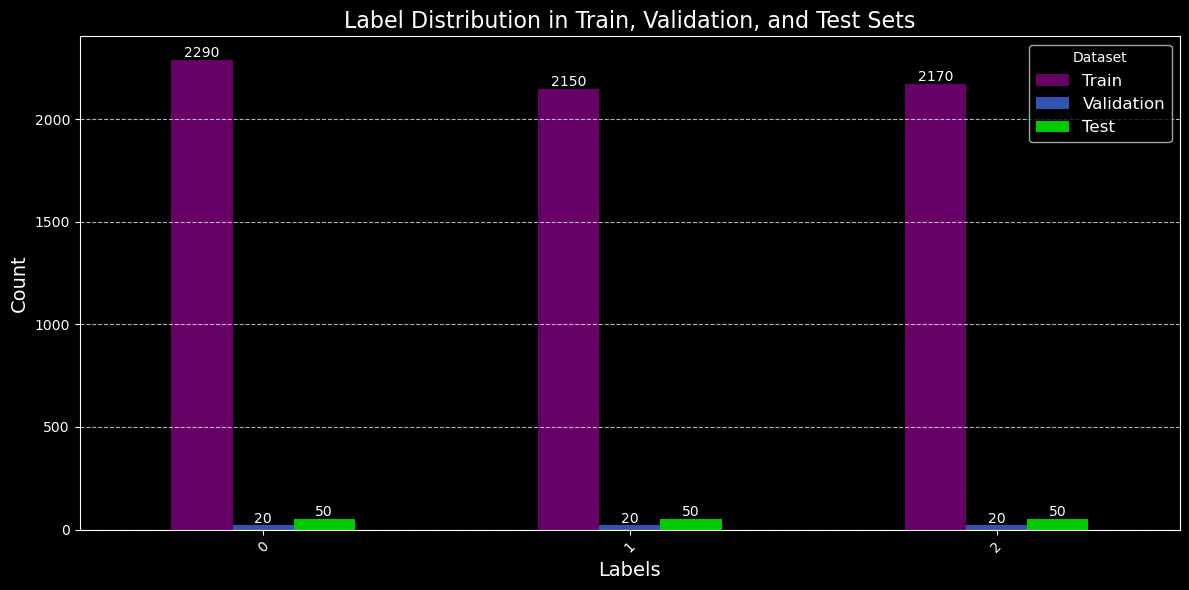

In [28]:
train_label_counts = Train_glcm_df['label'].value_counts()
val_label_counts = Validation_glcm_df['label'].value_counts()
test_label_counts = Test_glcm_df['label'].value_counts()

label_distribution = pd.DataFrame({
    'Train': train_label_counts,
    'Validation': val_label_counts,
    'Test': test_label_counts
})

colors = ['#800080', '#4169e1', '#00ff00']

# Plot the label distribution with customized bar colors
ax = label_distribution.plot(kind='bar', figsize=(12, 6), alpha=0.8, color=colors)

# Add annotations
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # The text to display
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordinates of the annotation
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset the text slightly above the bar
        textcoords='offset points',  # Relative offset
        fontsize=10, color='white'
    )

# Add title and labels
plt.title('Label Distribution in Train, Validation, and Test Sets', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Dataset', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

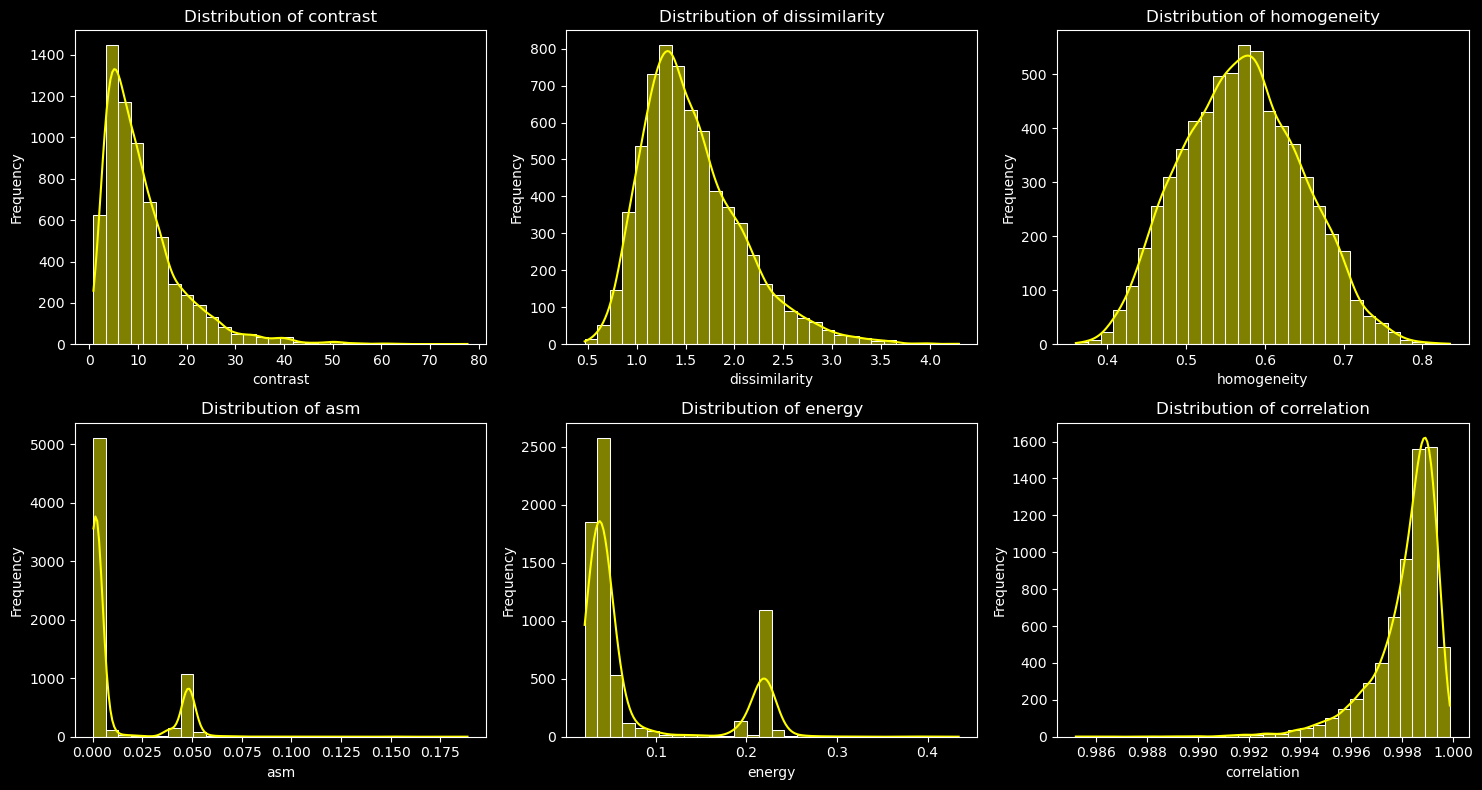

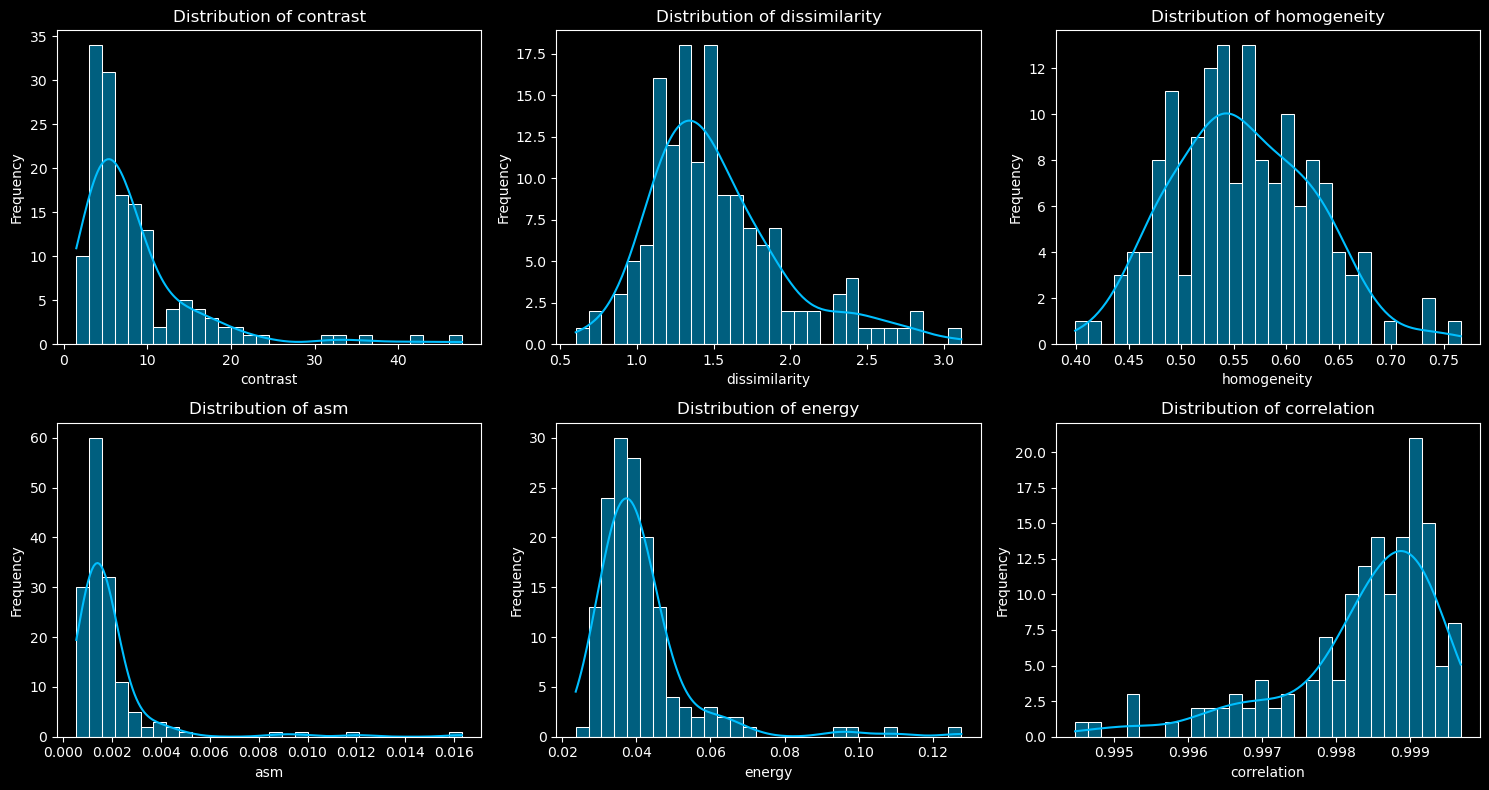

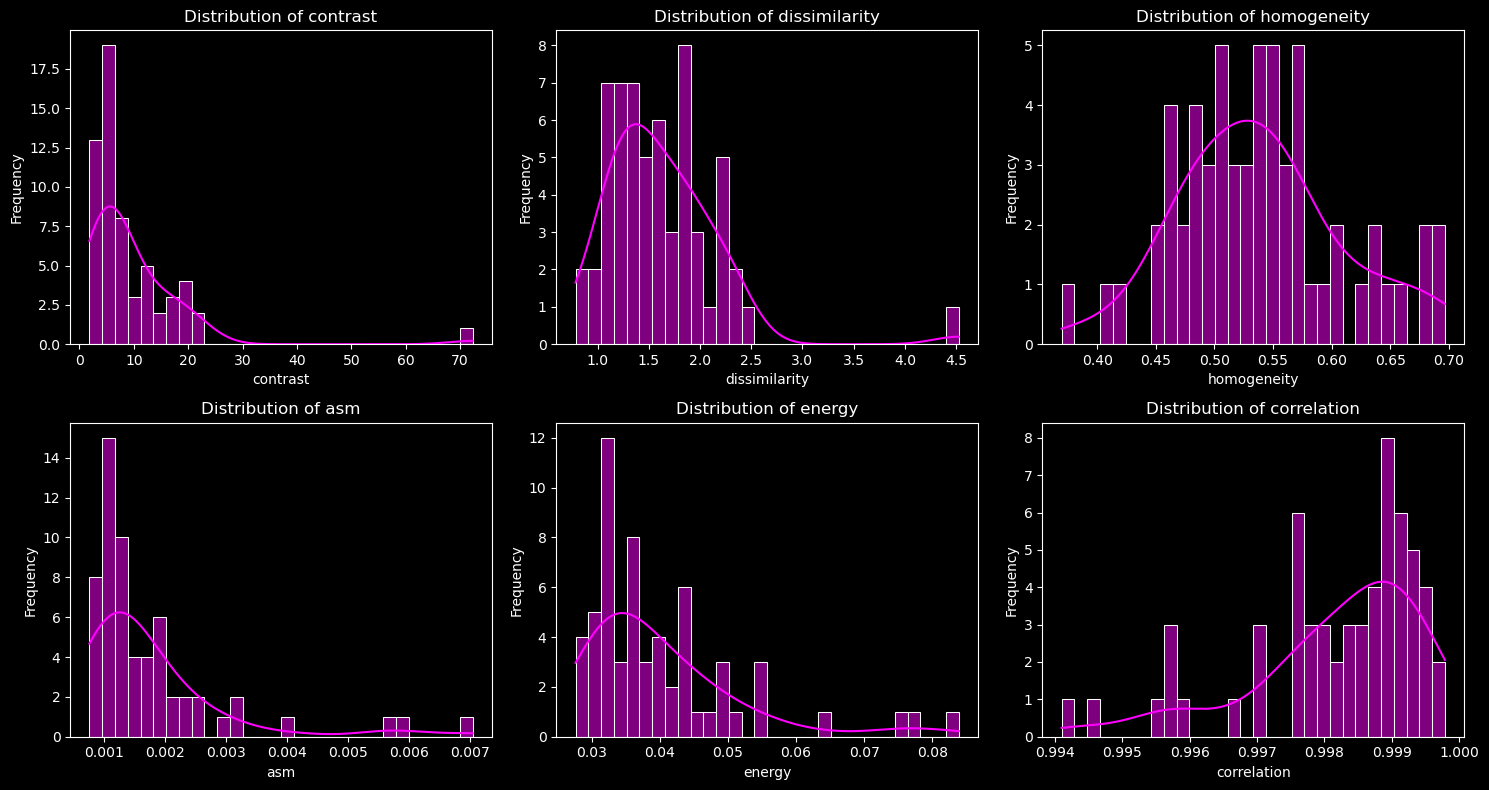

In [33]:
def plot_feature_distributions(data, features, exclude_column=None, rows=2,color='white'):
    # Exclude the specified column if provided
    if exclude_column:
        features = [feature for feature in features if feature != exclude_column]

    # Calculate the number of rows and columns for the subplots
    cols = (len(features) + rows - 1) // rows  # Calculate required columns
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
    axes = axes.flatten()  # Flatten axes for easy indexing

    for i, feature in enumerate(features):
        sns.histplot(data[feature], kde=True, bins=30, ax=axes[i], color=color)
        axes[i].set_title(f'Distribution of {feature}', fontsize=12)
        axes[i].set_xlabel(feature, fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)

    # Turn off unused subplots
    for i in range(len(features), len(axes)):
        axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Use the function on Train_glcm_df
plot_feature_distributions(Train_glcm_df, Train_glcm_df.columns, exclude_column='label', rows=2,color='#ffff00')
plot_feature_distributions(Test_glcm_df, Train_glcm_df.columns, exclude_column='label', rows=2,color='#00bfff')
plot_feature_distributions(Validation_glcm_df, Train_glcm_df.columns, exclude_column='label', rows=2,color='#ff00ff')

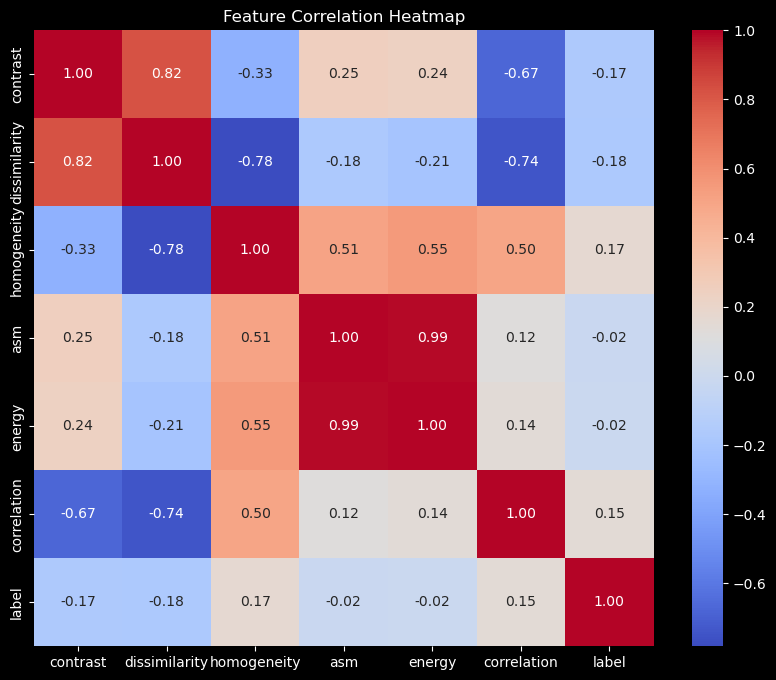

In [15]:
def plot_correlation_heatmap(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()
plot_correlation_heatmap(Train_glcm_df) 

In [19]:

X_train_glcm_df=Train_glcm_df.iloc[:, :-1]
X_val_glcm_df=Validation_glcm_df.iloc[:, :-1]
X_test_glcm_df =Test_glcm_df.iloc[:, :-1]
###########################################
y_train_glcm_df=Train_glcm_df.iloc[:, -1]
y_val_glcm_df=Validation_glcm_df.iloc[:, -1]
y_test_glcm_df =Test_glcm_df.iloc[:, -1] 

print(f"X_train shape: {X_train_glcm_df.shape}")
print(f"y_train shape: {y_train_glcm_df.shape}")
print(f"X_val shape: {X_val_glcm_df.shape}")
print(f"y_val shape: {y_val_glcm_df.shape}")
print(f"X_test shape: {X_test_glcm_df.shape}")
print(f"y_test shape: {y_test_glcm_df.shape}")

X_train shape: (6610, 6)
y_train shape: (6610,)
X_val shape: (60, 6)
y_val shape: (60,)
X_test shape: (150, 6)
y_test shape: (150,)


In [23]:

def scale_features(X_train, X_val, X_test):
    scaler = StandardScaler()
    
    # Fit the scaler on the training data and transform
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert to DataFrame and preserve column names
    X_train_scaled_glcm_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_val_scaled_glcm_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
    X_test_scaled_glcm_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled_glcm_df, X_val_scaled_glcm_df, X_test_scaled_glcm_df
X_train_scaled_glcm_df, X_val_scaled_glcm_df, X_test_scaled_glcm_df=scale_features(X_train_glcm_df, X_val_glcm_df, X_test_glcm_df)
print(f"X_train_scaled shape: {X_train_scaled_glcm_df.shape}")
print(f"X_val_scaled shape: {X_val_scaled_glcm_df.shape}")
print(f"X_test_scaled shape: {X_test_scaled_glcm_df.shape}")

X_train_scaled shape: (6610, 6)
X_val_scaled shape: (60, 6)
X_test_scaled shape: (150, 6)


In [24]:
print(f"X_train_scaled head(2): {X_train_scaled_glcm_df.head(2)}")
print(f"X_val_scaled head(2): {X_val_scaled_glcm_df.head(2)}")
print(f"X_test_scaled head(2): {X_test_scaled_glcm_df.head(2)}")


X_train_scaled head(2):    contrast  dissimilarity  homogeneity       asm    energy  correlation
0 -0.132041       0.338968    -0.979847 -0.556786 -0.696622     0.411239
1 -0.735574      -0.869447     0.932901 -0.502597 -0.489815     0.900469
X_val_scaled head(2):    contrast  dissimilarity  homogeneity       asm    energy  correlation
0 -0.371154       0.502519    -1.570734 -0.547878 -0.655352    -0.138199
1 -0.470774       0.173165    -1.042749 -0.539587 -0.620384    -0.164440
X_test_scaled head(2):    contrast  dissimilarity  homogeneity       asm    energy  correlation
0 -0.579544       0.243725    -1.399013 -0.549235 -0.661364     0.340107
1 -1.036554      -1.265885     1.020599 -0.473479 -0.405020     0.656382


# SVM Trials

# KNN Trials

# Random forest Trials

# Xgboost Trials